In [ ]:
!pip install imbalanced-learn
!pip install category_encoders
!pip install -U scikit-learn
!pip install --upgrade scikit-learn
!conda update -c conda-forge scikit-learn
!pip install -U imbalanced-learn
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, classification_report
import category_encoders as ce
from imblearn.over_sampling import SMOTE, SVMSMOTE

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 1.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.8/10.8 MB 33.0 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.2
    Uninstalling scikit-learn-1.2.2:
      Successfully uninstalled scikit-learn-1.2.2
/bin/bash: line 1: conda: command not found
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.6/235.6 kB 4.6 MB/s eta 0:00:00
  Attempting uninstall: imbalanced-learn
    Found existing installation: imbalanced-learn 0.10.1
    Uninstalling imbalanced-learn-0.10.1:
      Successfully uninstalled imbalanced-learn-0.10.1


Đọc dữ liệu

In [ ]:
customer_data = pd.read_csv("/content/customer-v2.csv")
customer_data

,MAKHACHHANG,PHUONGXA,QUANHUYEN,LOAIDICHVU,LOAIKHACHHANG,SODICHVU,SOLANBAOHONG,SOLANGOIKIEMBAOHONG,SOLANBAOHONGHAILONG,SOLANBAOHONGKHONGHAILONG,...,KHAOSATLAPMOIHAILONG,KHAOSATLAPMOIKHONGHAILONG,SOLANCHAMSOC,SOLANTAMNGUNG,SOTHANGSUDUNGDICHVU,GIADICHVU,KHONGPHATSINHLUULUONG,HINHTHUCTHANHTOAN,DIEMTINNHIEM,THANHLY
0,658108,TT Thới Lai,TLI,MyTV,0,3,0,0,0,0,...,0,1,1,0,5,50000,0,0,70,0
1,658479,Phường Hưng Phú,CRG,MyTV,0,3,0,0,0,0,...,0,1,0,0,5,50000,1,1,72,0
2,655480,Phường Châu Văn Liêm,OMN,MyTV,0,2,0,0,0,0,...,0,1,2,0,5,50000,2,0,66,0
3,660684,Phường Bình Thuỷ,BTY,MyTV,0,2,0,0,0,0,...,0,1,2,0,4,50000,2,1,72,0
4,653594,Xã Thới Tân,TLI,MyTV,0,2,0,0,0,0,...,0,0,0,0,5,50000,1,0,61,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3212,653825,Xã Thới Hưng,CDO,MyTV,0,2,0,0,0,0,...,0,0,1,0,5,81818,0,0,70,0
3213,640793,Phường Thuận Hưng,TNT,MyTV,0,2,0,0,0,0,...,0,0,1,0,6,50000,2,0,72,0
3214,660235,Xã Mỹ Khánh,PDN,MyTV,0,3,0,0,0,0,...,0,1,3,0,4,50000,5,0,72,0
3215,589448,Phường Thốt Nốt,TNT,MyTV,0,2,0,0,0,0,...,0,0,1,0,6,50000,1,0,67,0


Xem qua dữ liệu -EDA

In [ ]:
customer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3217 entries, 0 to 3216
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   MAKHACHHANG                3217 non-null   int64 
 1   PHUONGXA                   3217 non-null   object
 2   QUANHUYEN                  3217 non-null   object
 3   LOAIDICHVU                 3217 non-null   object
 4   LOAIKHACHHANG              3217 non-null   int64 
 5   SODICHVU                   3217 non-null   int64 
 6   SOLANBAOHONG               3217 non-null   int64 
 7   SOLANGOIKIEMBAOHONG        3217 non-null   int64 
 8   SOLANBAOHONGHAILONG        3217 non-null   int64 
 9   SOLANBAOHONGKHONGHAILONG   3217 non-null   int64 
 10  KHAOSATLAPMOI              3217 non-null   int64 
 11  KHAOSATLAPMOIHAILONG       3217 non-null   int64 
 12  KHAOSATLAPMOIKHONGHAILONG  3217 non-null   int64 
 13  SOLANCHAMSOC               3217 non-null   int64 
 14  SOLANTAM

In [ ]:
customer_data.isnull().sum()

MAKHACHHANG                  0
PHUONGXA                     0
QUANHUYEN                    0
LOAIDICHVU                   0
LOAIKHACHHANG                0
SODICHVU                     0
SOLANBAOHONG                 0
SOLANGOIKIEMBAOHONG          0
SOLANBAOHONGHAILONG          0
SOLANBAOHONGKHONGHAILONG     0
KHAOSATLAPMOI                0
KHAOSATLAPMOIHAILONG         0
KHAOSATLAPMOIKHONGHAILONG    0
SOLANCHAMSOC                 0
SOLANTAMNGUNG                0
SOTHANGSUDUNGDICHVU          0
GIADICHVU                    0
KHONGPHATSINHLUULUONG        0
HINHTHUCTHANHTOAN            0
DIEMTINNHIEM                 0
THANHLY                      0
dtype: int64

In [ ]:
object_cols = [f for f in customer_data.columns if customer_data[f].dtype =="O"]
print(object_cols)

['PHUONGXA', 'QUANHUYEN', 'LOAIDICHVU']


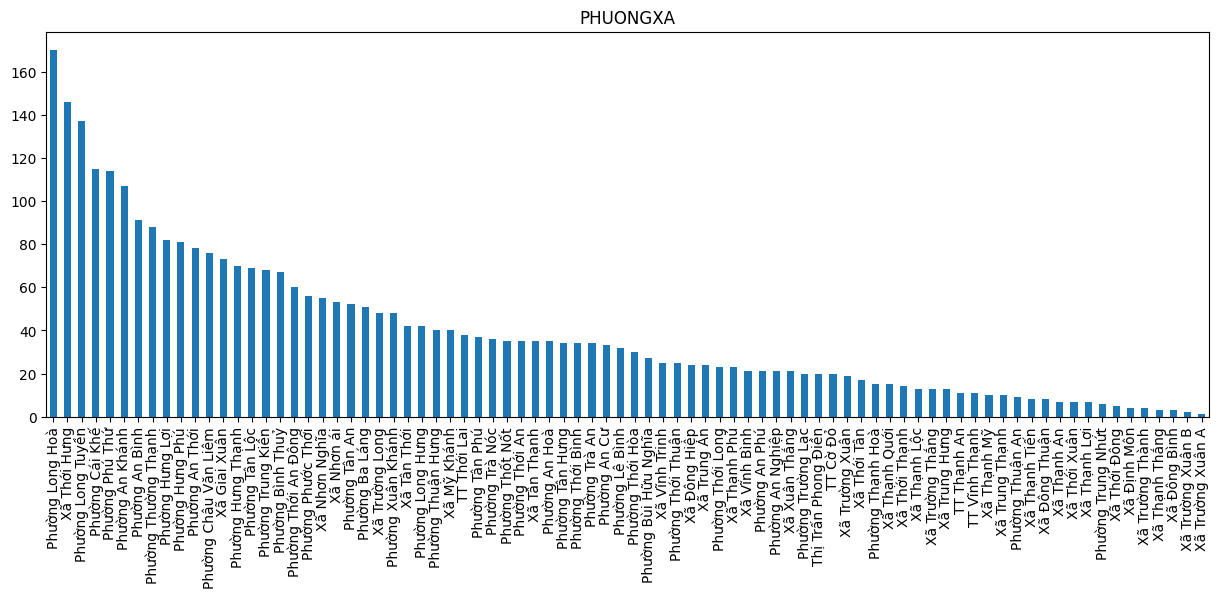

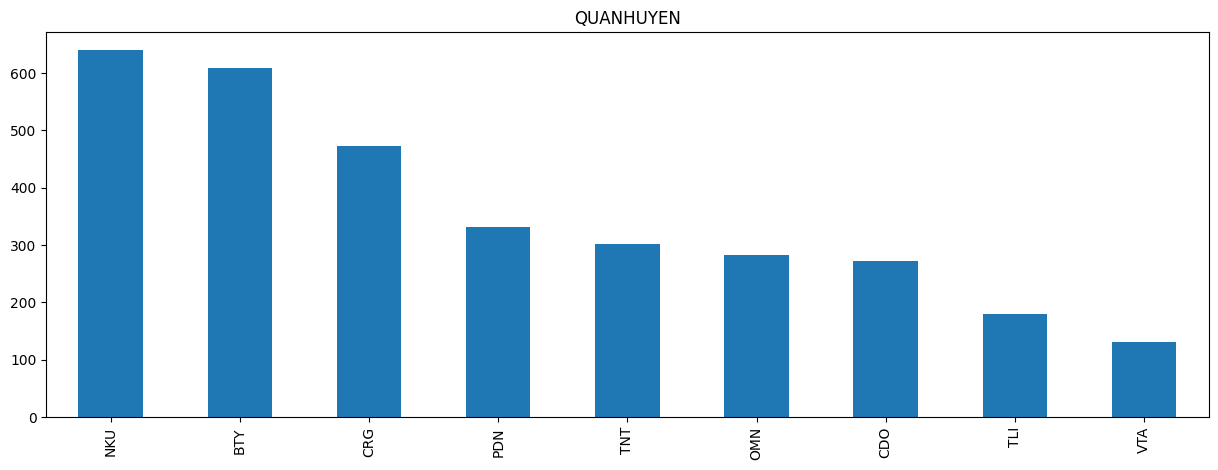

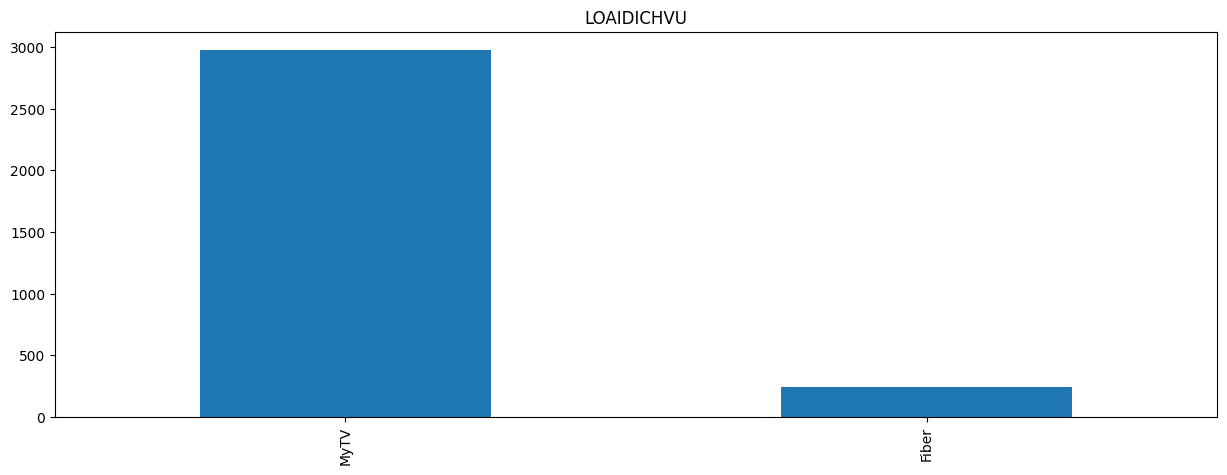

In [ ]:
for col in object_cols:
  customer_data[col].value_counts().plot(kind='bar', figsize=(15,5))
  plt.title(col)
  plt.show()

In [ ]:
numeric_cols = [f for f in customer_data.columns if customer_data[f].dtype !="O"]
print(numeric_cols)

['MAKHACHHANG', 'LOAIKHACHHANG', 'SODICHVU', 'SOLANBAOHONG', 'SOLANGOIKIEMBAOHONG', 'SOLANBAOHONGHAILONG', 'SOLANBAOHONGKHONGHAILONG', 'KHAOSATLAPMOI', 'KHAOSATLAPMOIHAILONG', 'KHAOSATLAPMOIKHONGHAILONG', 'SOLANCHAMSOC', 'SOLANTAMNGUNG', 'SOTHANGSUDUNGDICHVU', 'GIADICHVU', 'KHONGPHATSINHLUULUONG', 'HINHTHUCTHANHTOAN', 'DIEMTINNHIEM', 'THANHLY']


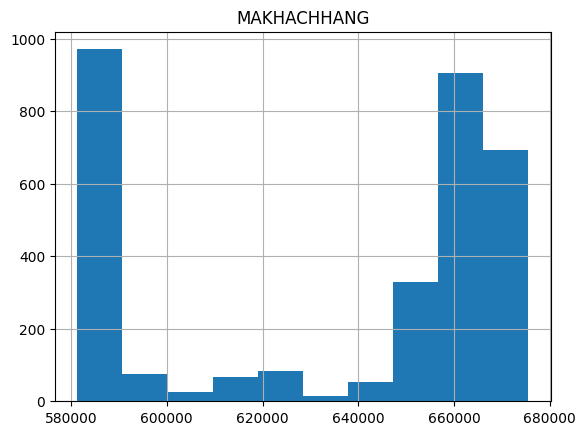

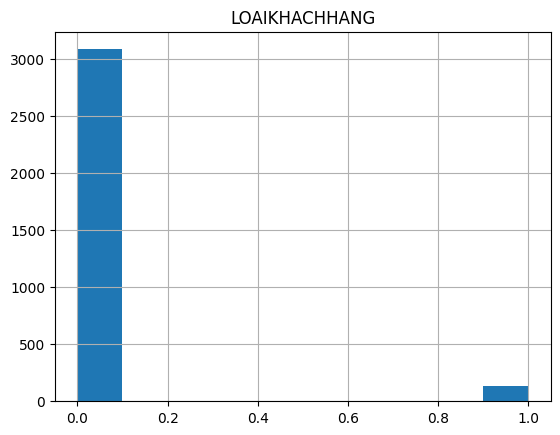

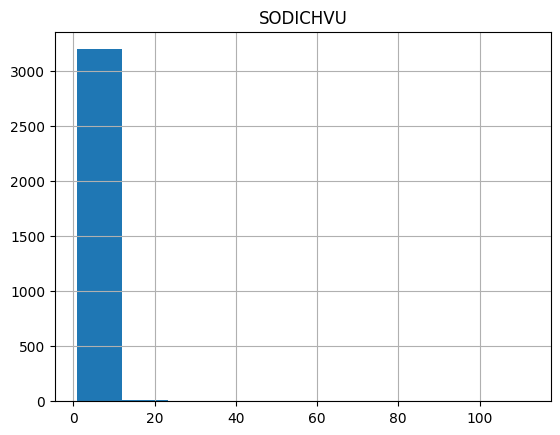

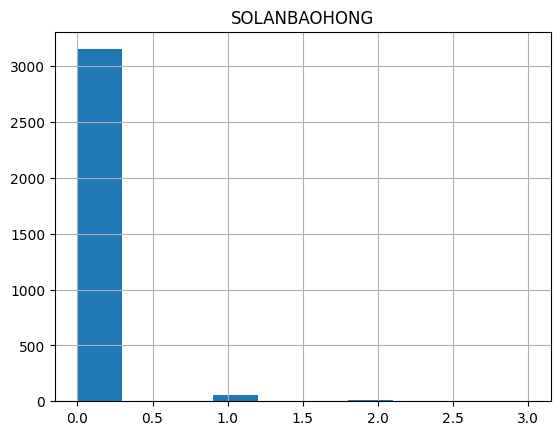

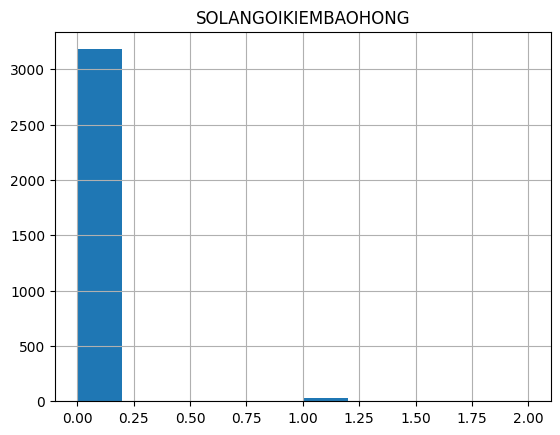

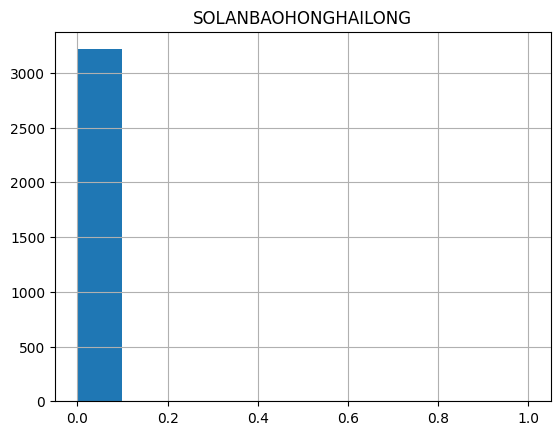

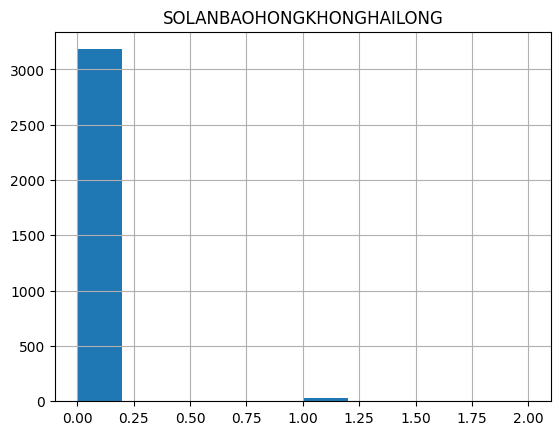

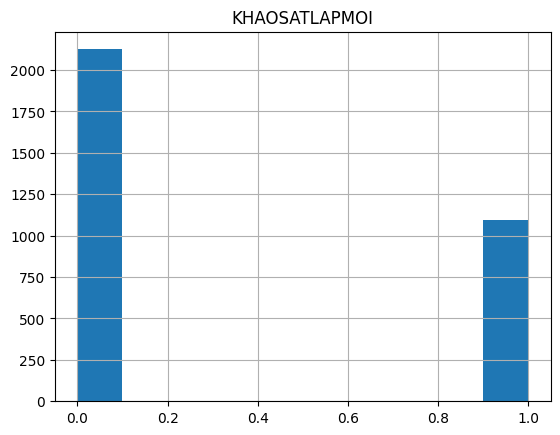

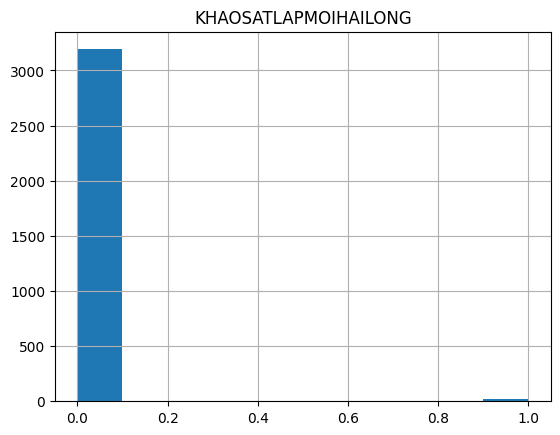

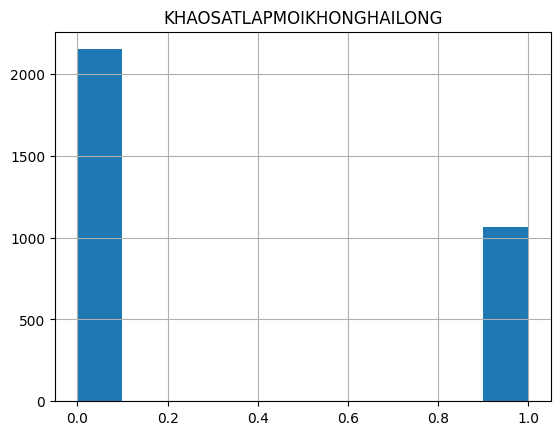

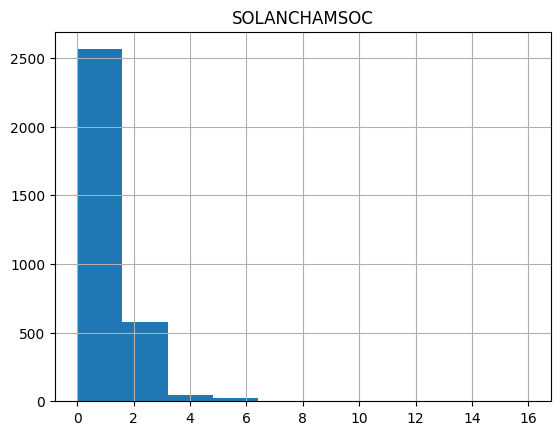

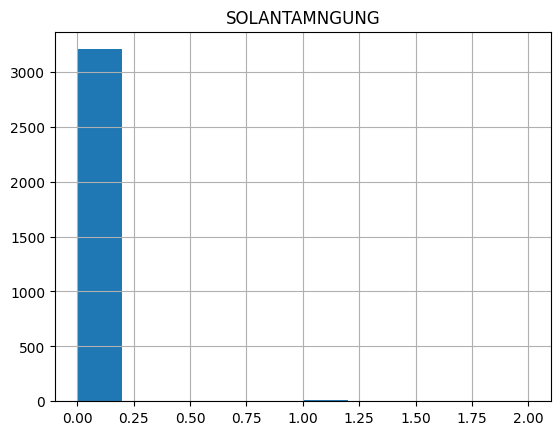

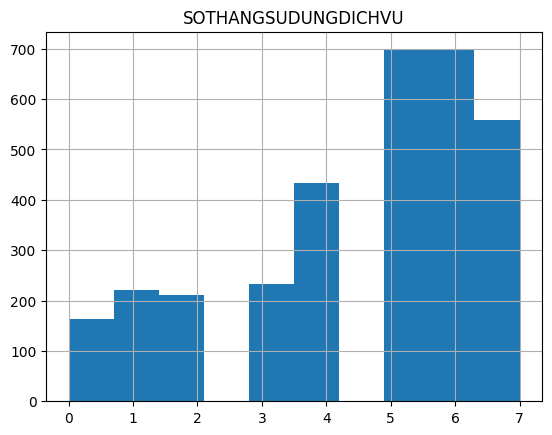

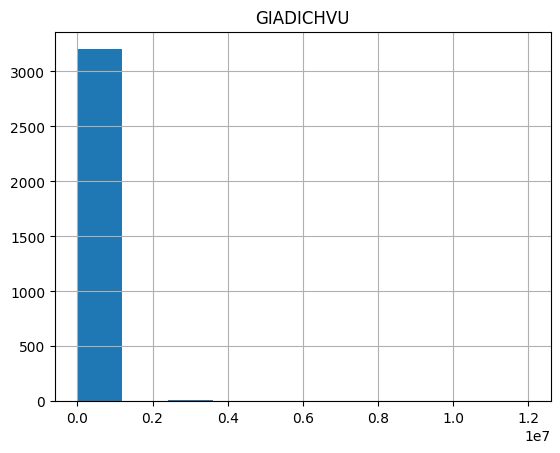

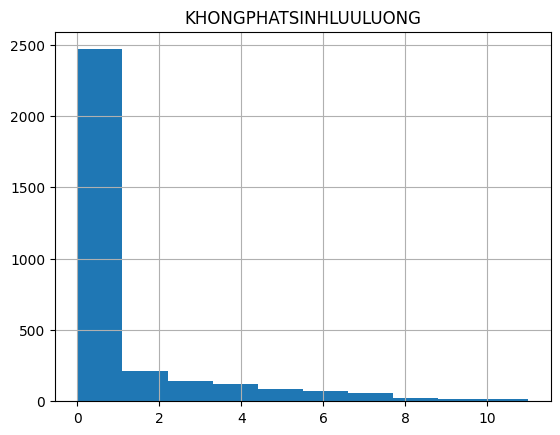

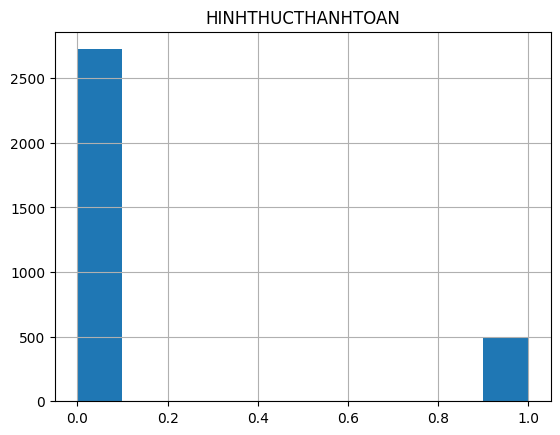

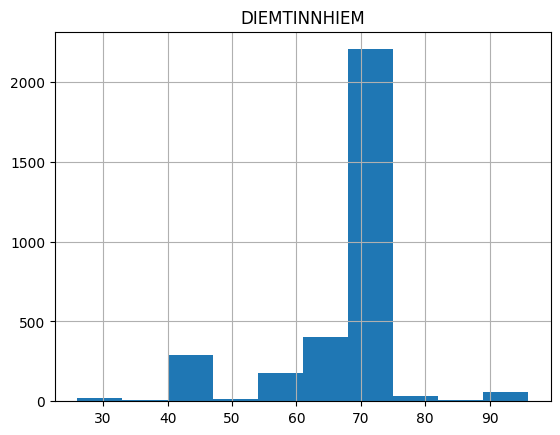

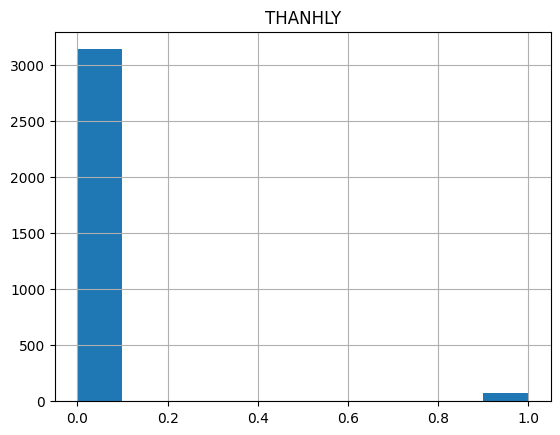

In [ ]:
for col in numeric_cols:
  customer_data[col].hist()
  plt.title(col)
  plt.show()

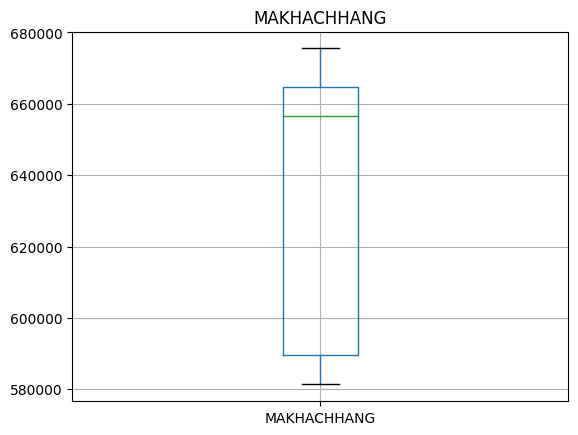

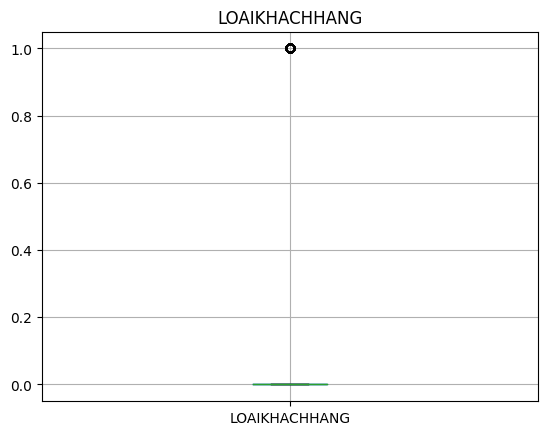

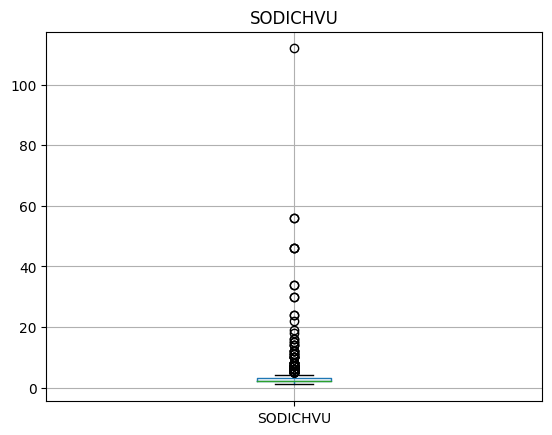

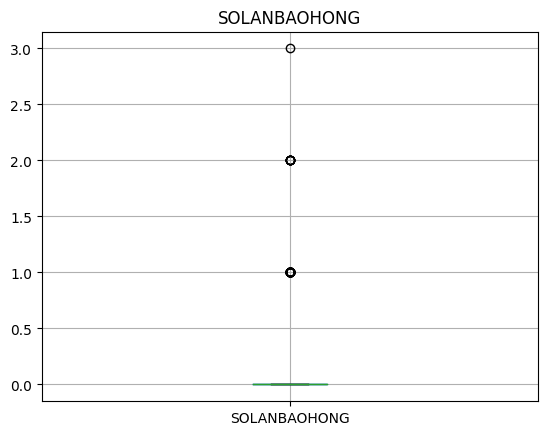

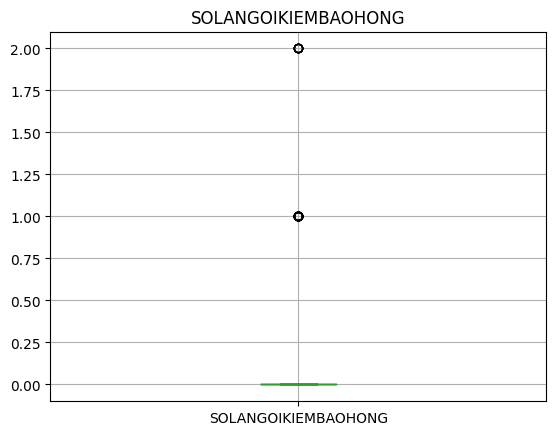

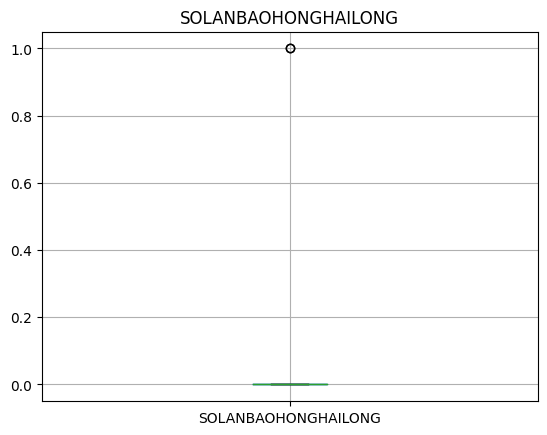

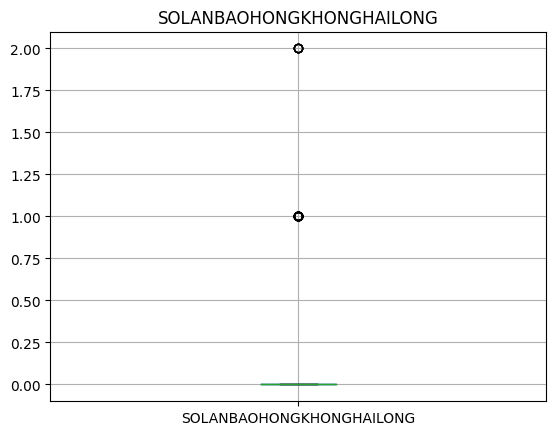

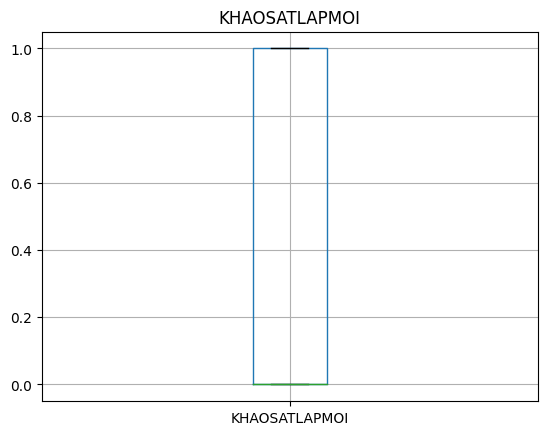

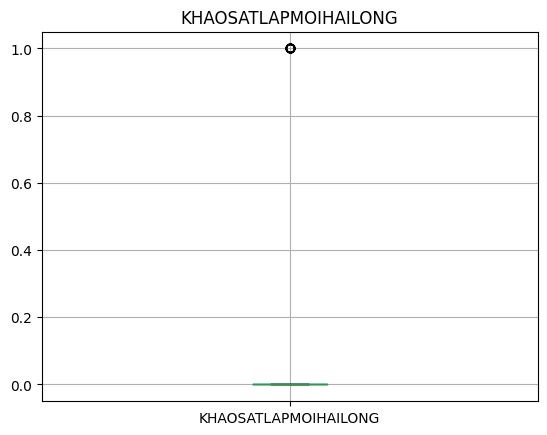

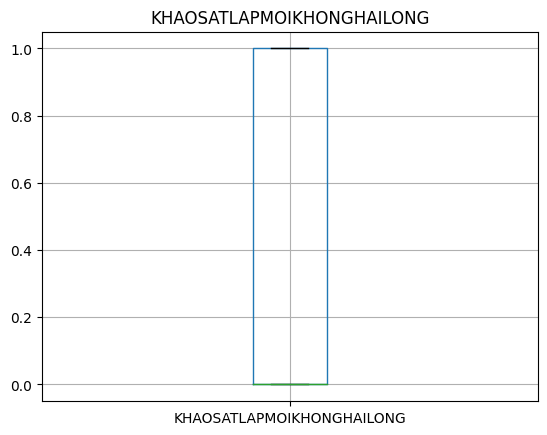

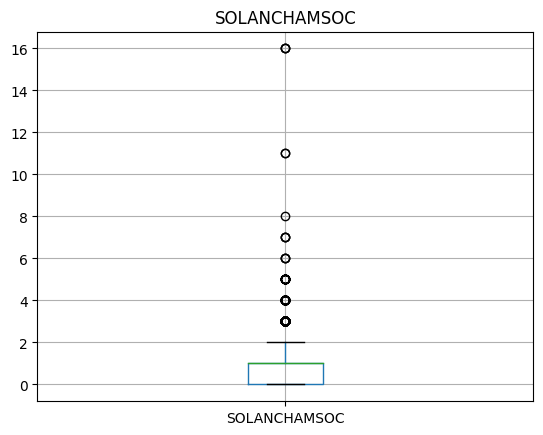

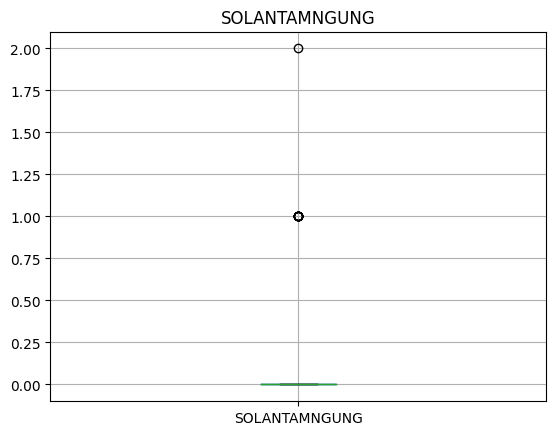

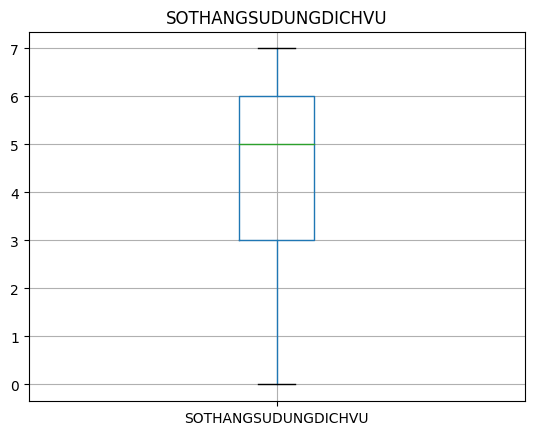

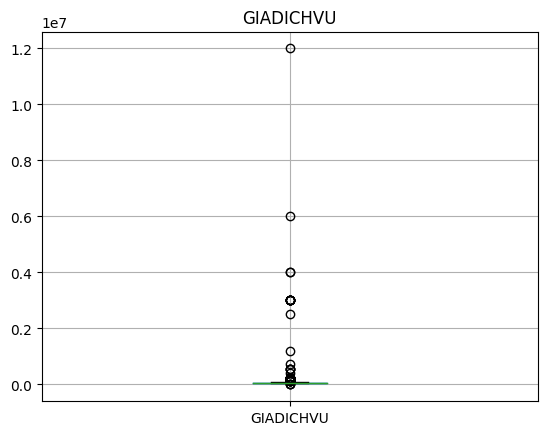

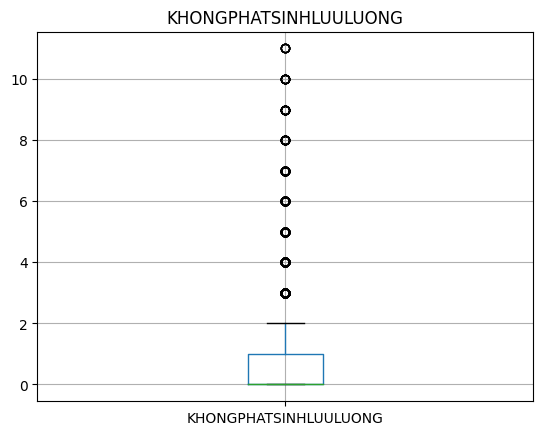

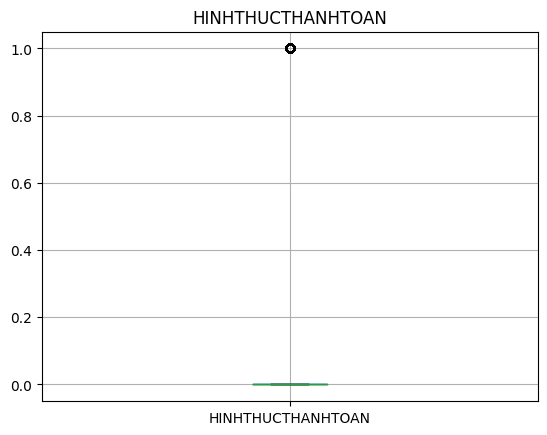

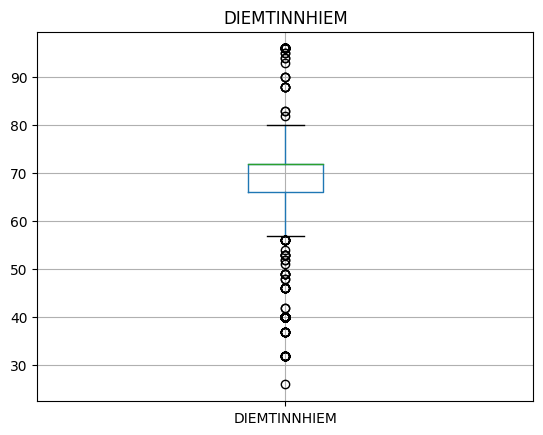

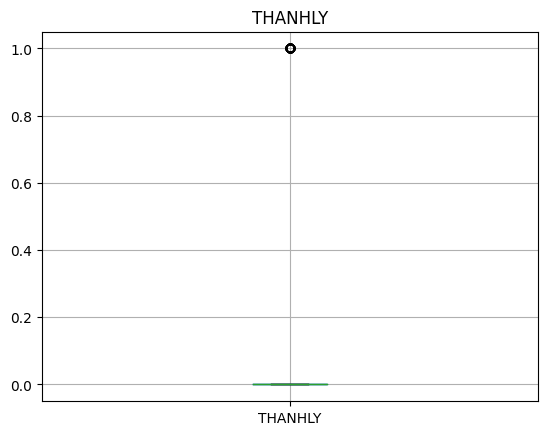

In [ ]:
for col in numeric_cols:
  customer_data.boxplot(column=[col])
  plt.title(col)
  plt.show()